# import libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro

# Read file

In [57]:
income=pd.read_csv("Income.csv")
income

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,40,13,0.0000,0.00,3020,43,16,9.2715,10,10,9.5,5,28200
749,0,31,12,0.0000,0.00,2056,33,12,4.8638,12,12,7.5,14,10000
750,0,43,12,0.0000,0.00,2383,43,12,1.0898,10,3,7.5,4,9952
751,0,60,12,0.0000,0.00,1705,55,8,12.4400,12,12,14.0,15,24984


# Check for null in dataset

In [58]:
income.isnull().sum()

WorkingHoursWife       0
WifeAge                0
EducationWife          0
WifeHourEarnings       0
WifeWage               0
WorkingHoursHusband    0
HusbandAge             0
EducationHusband       0
HusbandWage            0
EducationWifeMother    0
EducationWifeFather    0
UnemploymentRate       0
WifeExperience         0
FamilyIncome           0
dtype: int64

# Check for shape of dataset

In [59]:
income.shape

(753, 14)

# Check dataset info

In [60]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WorkingHoursWife     753 non-null    int64  
 1   WifeAge              753 non-null    int64  
 2   EducationWife        753 non-null    int64  
 3   WifeHourEarnings     753 non-null    float64
 4   WifeWage             753 non-null    float64
 5   WorkingHoursHusband  753 non-null    int64  
 6   HusbandAge           753 non-null    int64  
 7   EducationHusband     753 non-null    int64  
 8   HusbandWage          753 non-null    float64
 9   EducationWifeMother  753 non-null    int64  
 10  EducationWifeFather  753 non-null    int64  
 11  UnemploymentRate     753 non-null    float64
 12  WifeExperience       753 non-null    int64  
 13  FamilyIncome         753 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 82.5 KB


# Boxplot for outliers

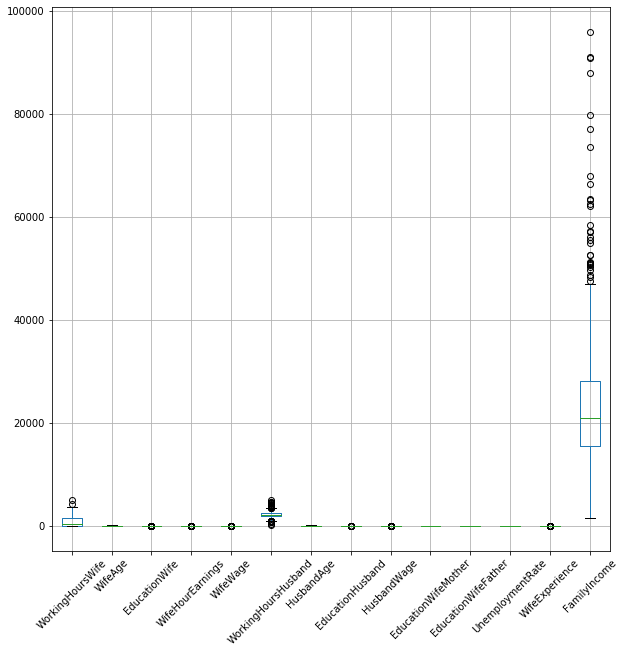

In [61]:
fig,ax=plt.subplots(figsize=(10,10))
income.boxplot(ax=ax,rot=45)
plt.show()

# Stats detail of the dataset

In [62]:
income.describe()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000
mean,740.576361,42.537849,12.286853,2.374565,1.849734,2267.270916,45.120850,12.491368,7.482179,9.250996,8.808765,8.623506,10.63081,23080.594954
std,871.314216,8.072574,2.280246,3.241829,2.419887,595.566649,8.058793,3.020804,4.230559,3.367468,3.572290,3.114934,8.06913,12190.202026
min,0.000000,30.000000,5.000000,0.000000,0.000000,175.000000,30.000000,3.000000,0.412100,0.000000,0.000000,3.000000,0.00000,1500.000000
25%,0.000000,36.000000,12.000000,0.000000,0.000000,1928.000000,38.000000,11.000000,4.788300,7.000000,7.000000,7.500000,4.00000,15428.000000
50%,288.000000,43.000000,12.000000,1.625000,0.000000,2164.000000,46.000000,12.000000,6.975800,10.000000,7.000000,7.500000,9.00000,20880.000000
75%,1516.000000,49.000000,13.000000,3.787900,3.580000,2553.000000,52.000000,15.000000,9.166700,12.000000,12.000000,11.000000,15.00000,28200.000000
max,4950.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,17.000000,40.509000,17.000000,17.000000,14.000000,45.00000,96000.000000


# Correlation matrix between the numerical variable

In [63]:
income.corr()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
WorkingHoursWife,1.000000,-0.033114,0.105960,0.422944,0.606916,-0.056348,-0.031089,-0.009650,-0.098599,0.057864,0.013671,-0.060290,0.404959,0.146306
WifeAge,-0.033114,1.000000,-0.120223,-0.034559,-0.058315,-0.084372,0.888138,-0.163049,0.027015,-0.234642,-0.160591,0.077077,0.334016,0.052440
EducationWife,0.105960,-0.120223,1.000000,0.318378,0.267575,0.078916,-0.133522,0.611954,0.284936,0.435336,0.442458,0.072140,0.066256,0.361275
WifeHourEarnings,0.422944,-0.034559,0.318378,1.000000,0.651641,-0.059919,-0.031836,0.126224,0.061290,0.090305,0.098477,-0.000128,0.250580,0.231175
WifeWage,0.606916,-0.058315,0.267575,0.651641,1.000000,-0.070797,-0.055399,0.106967,0.019276,0.085598,0.102772,0.009124,0.341557,0.208712
WorkingHoursHusband,-0.056348,-0.084372,0.078916,-0.059919,-0.070797,1.000000,-0.095387,0.107845,-0.236021,0.053354,0.050345,-0.155220,-0.099366,0.128142
HusbandAge,-0.031089,0.888138,-0.133522,-0.031836,-0.055399,-0.095387,1.000000,-0.195323,0.019681,-0.227457,-0.135000,0.053094,0.271910,0.040503
EducationHusband,-0.009650,-0.163049,0.611954,0.126224,0.106967,0.107845,-0.195323,1.000000,0.394665,0.324475,0.366700,0.055017,-0.036301,0.376872
HusbandWage,-0.098599,0.027015,0.284936,0.061290,0.019276,-0.236021,0.019681,0.394665,1.000000,0.126736,0.193229,0.157920,-0.103306,0.725023
EducationWifeMother,0.057864,-0.234642,0.435336,0.090305,0.085598,0.053354,-0.227457,0.324475,0.126736,1.000000,0.573072,0.018402,-0.082179,0.159894


# Pairplot to visualize the correlation matrix

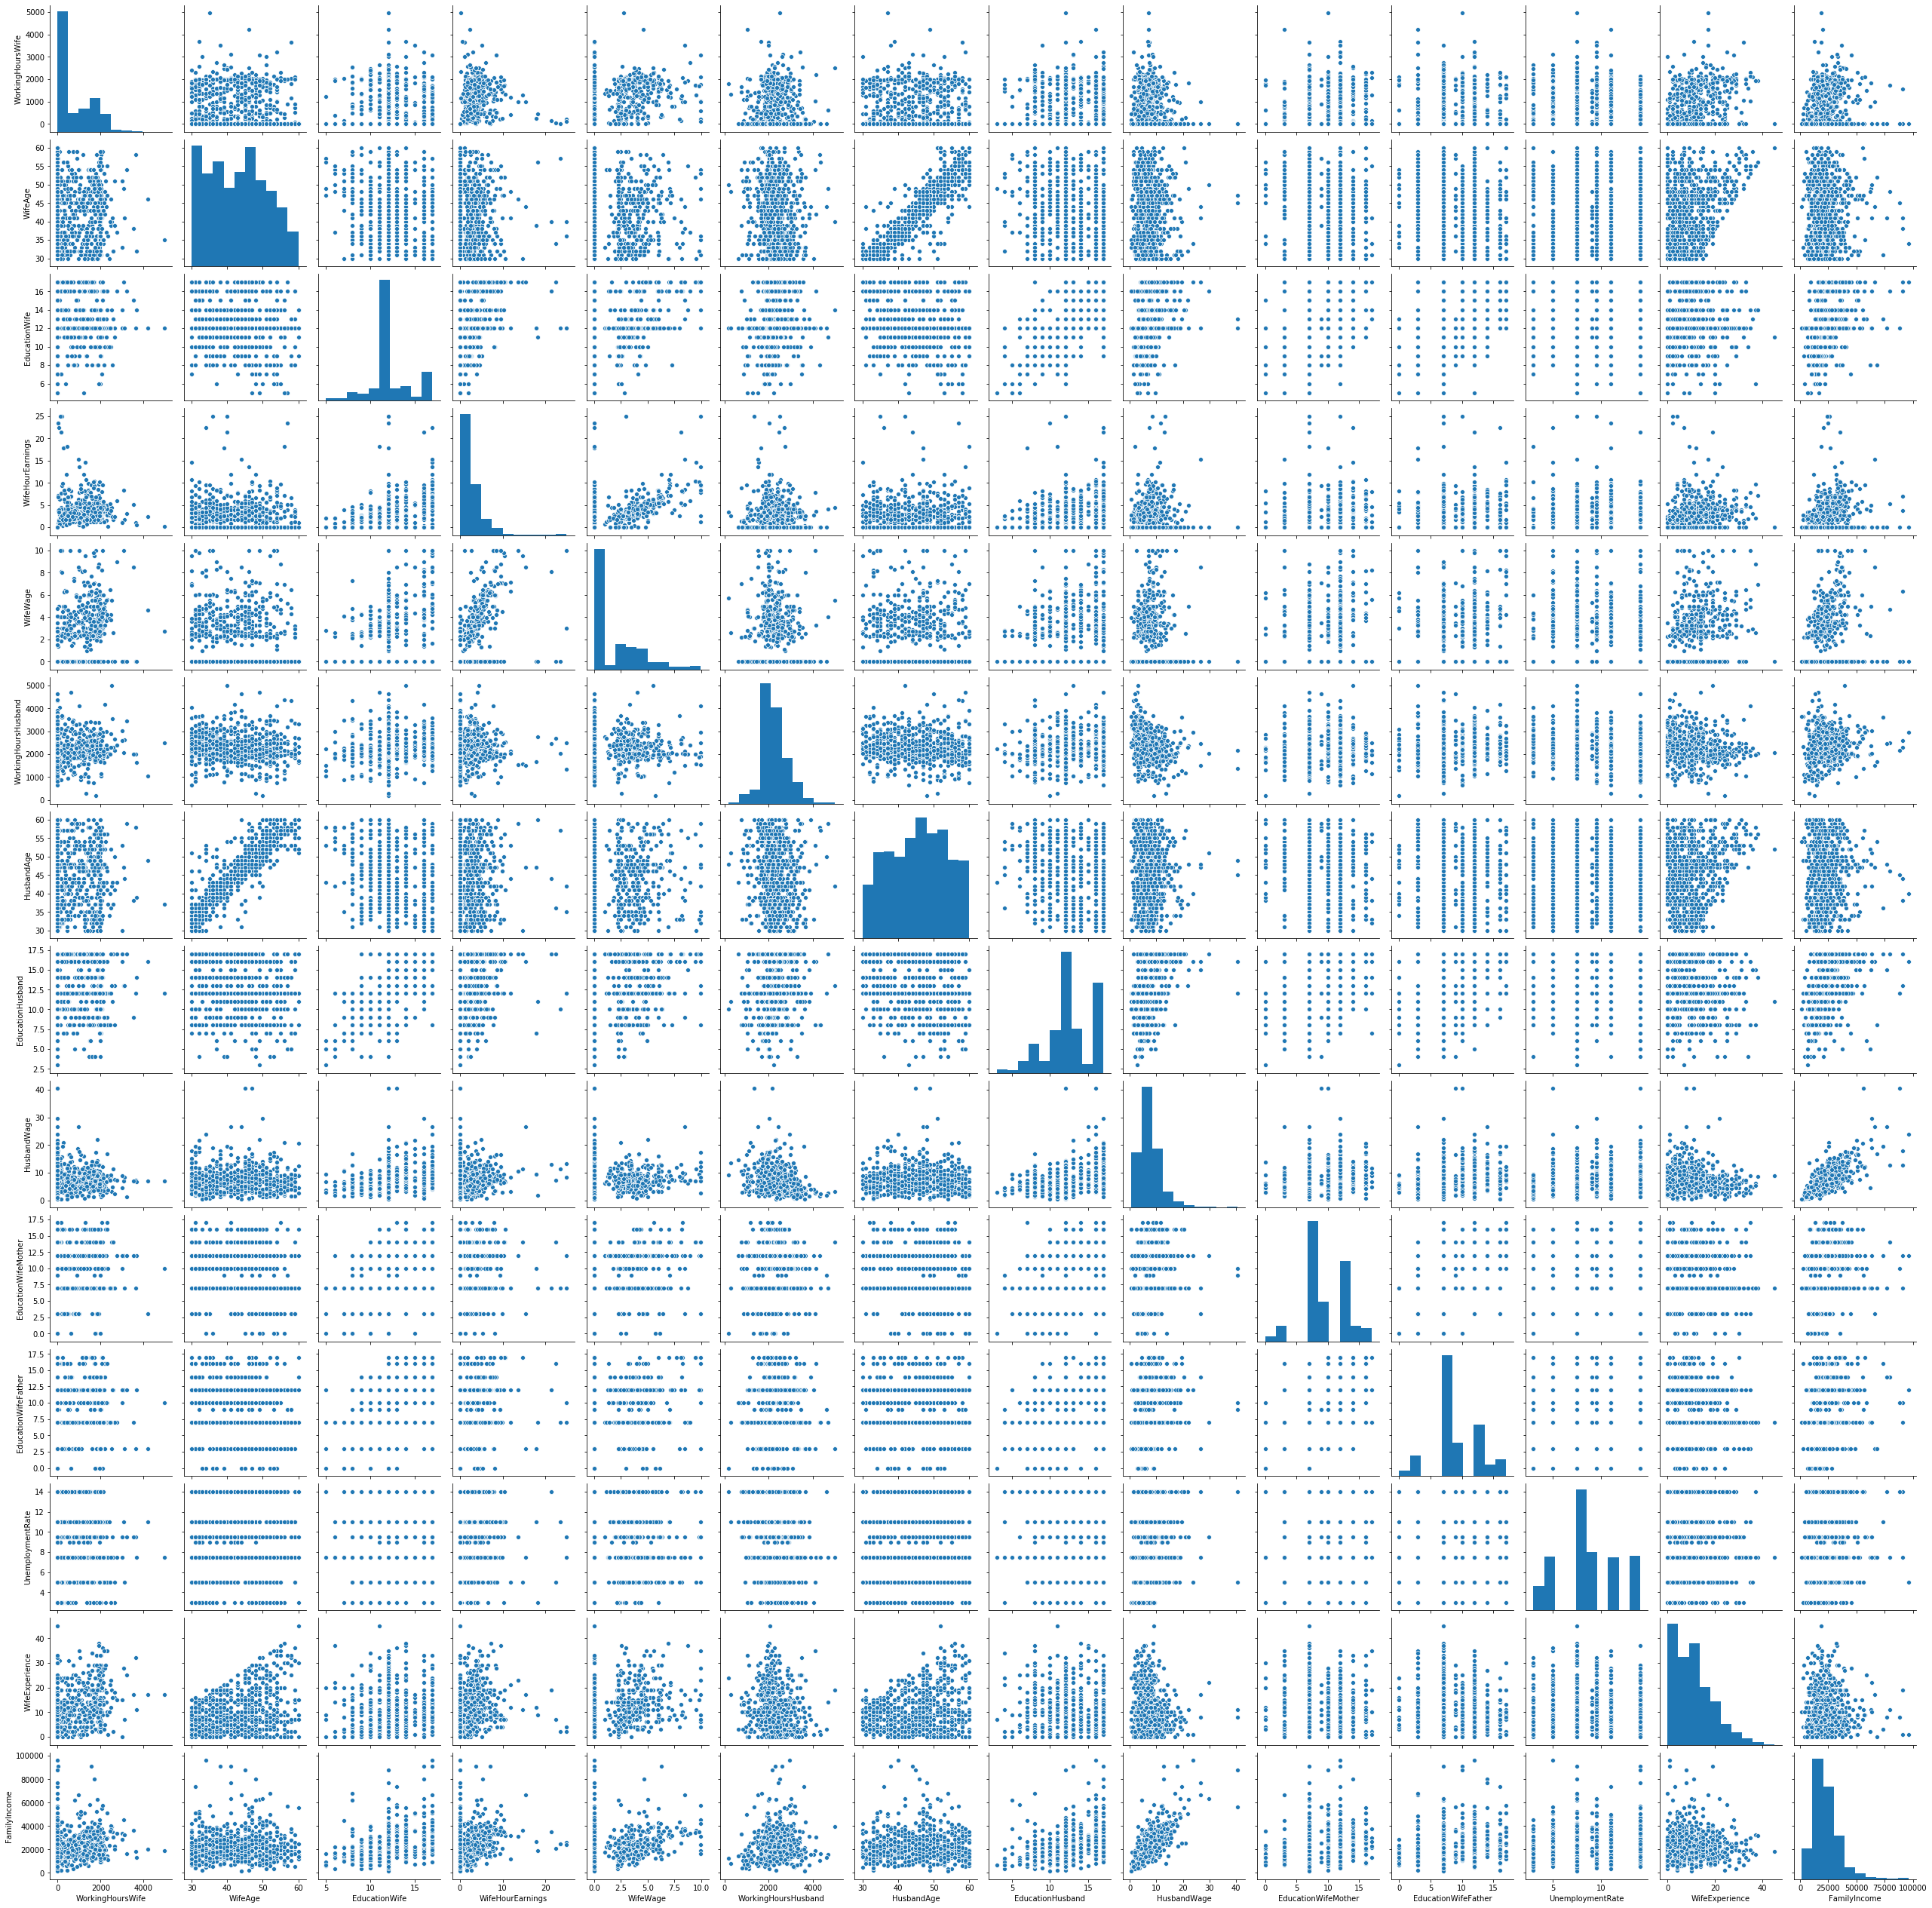

In [64]:
sns.pairplot(income)

# heatmap for corr coeff

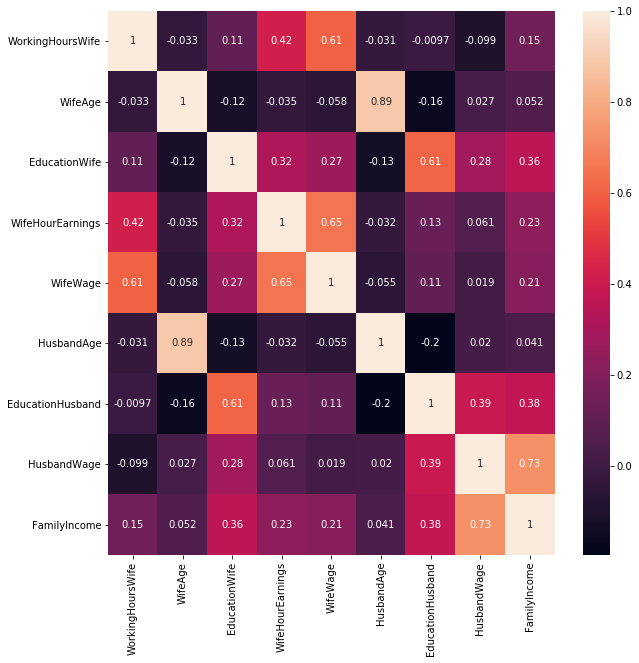

In [65]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap((income.drop(['WorkingHoursHusband','UnemploymentRate','WifeExperience','EducationWifeMother','EducationWifeFather'],axis=1)).corr(),annot=True,ax=ax)
plt.show()

# scatterplot between highly correlated variables

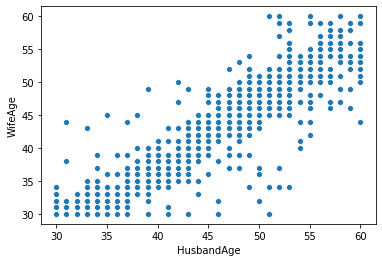

In [66]:
sns.scatterplot(income['HusbandAge'],income['WifeAge'])

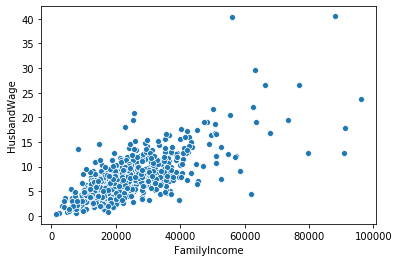

In [67]:
sns.scatterplot(income['FamilyIncome'],income['HusbandWage'])

# Standardize the data

In [68]:
from scipy.stats import zscore
data_scaled=income.apply(zscore)
data_scaled.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818,-0.555782
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285,-0.105121
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830,-0.167508
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274,-1.295391
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262,0.346361


# split the data in dependent and independent variable

In [69]:
X=data_scaled.drop(['FamilyIncome'],axis=1)
Y=data_scaled['FamilyIncome']
X=sm.add_constant(X)

# Model build

In [70]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          8.01e-186
Time:                        20:46:00   Log-Likelihood:                -608.73
No. Observations:                 753   AIC:                             1245.
Df Residuals:                     739   BIC:                             1310.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.296e-17      0.020   1.65e-15      1.000      -0.039       0.039
WorkingHoursWife        0.1981      0.027      7.456      0.000       0.146       0.250
WifeAge                 0.0888      0.045      1.967      0.050       0.000       0.178
EducationWife           0.0702      0.029      2.449      0.015       0.014       0.126
WifeHourEarnings        0.0827      0.027      3.060      0.002       0.030       0.136
WifeWage                0.0551      0.031      1.802      0.072      -0.005       0.115
WorkingHoursHusband     0.3312      0.022     15.356      0.000       0.289       0.374
HusbandAge              0.0182      0.044      0.412      0.680      -0.068       0.105
EducationHusband       -0.0187      0.027     -0.682      0.495      -0.072       0.035
HusbandWage             0.7934      0.024     33.699      0.000       0.747       0.840
EducationWifeMother     0.0088      0.026      0.341      0.733      -0.042       0.059
EducationWifeFather     0.0072      0.026      0.282      0.778      -0.043       0.057
UnemploymentRate       -0.0130      0.021     -0.634      0.526      -0.053       0.027
WifeExperience         -0.0712      0.024     -2.923      0.004      -0.119      -0.023
==============================================================================
Omnibus:                      404.335   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5410.657
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      15.438   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict the value based on model

In [71]:
ypred = model.predict(X)
X['pred']=ypred
X['pred']

0     -0.319787
1      0.276014
2     -0.017326
3     -1.021386
4      0.553699
         ...   
748    0.501354
749   -1.051826
750   -1.358523
751    0.532333
752   -0.220275
Name: pred, Length: 753, dtype: float64

# Find the error term- diff between predicted and actual

In [72]:
X['error']=Y-X['pred']
X['error']

0     -0.235996
1     -0.381135
2     -0.150181
3     -0.274006
4     -0.207339
         ...   
748   -0.081114
749   -0.021929
750    0.280827
751   -0.376087
752    0.653895
Name: error, Length: 753, dtype: float64

# check of assumption -  model is linear

<function matplotlib.pyplot.show(*args, **kw)>

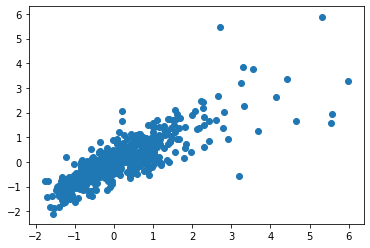

In [73]:
plt.scatter(Y,X['pred'])
plt.show

# check of assumption- error term is homoscedastic in nature

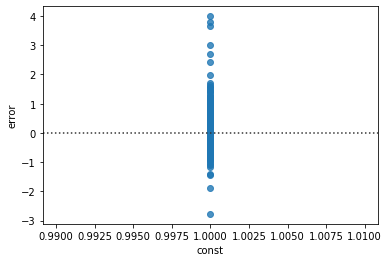

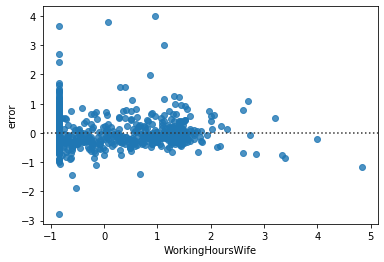

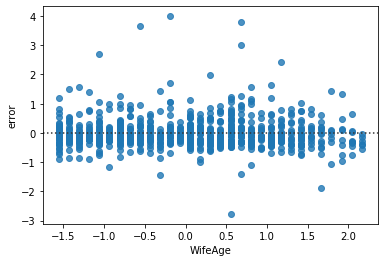

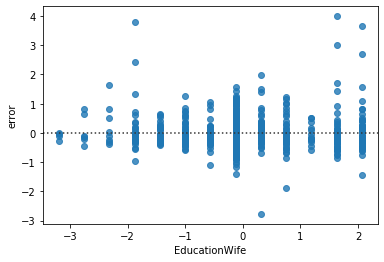

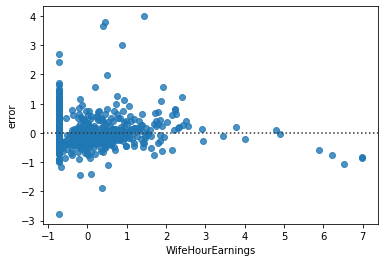

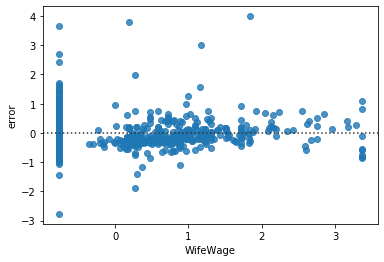

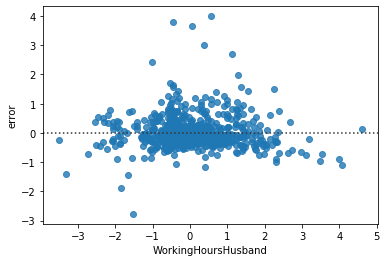

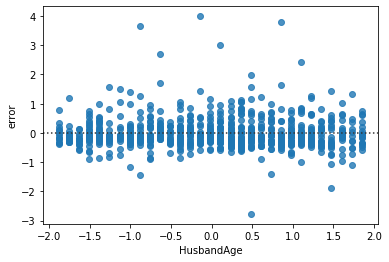

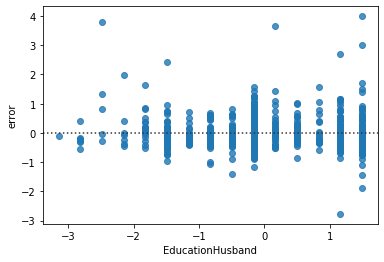

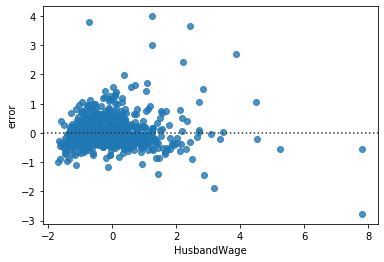

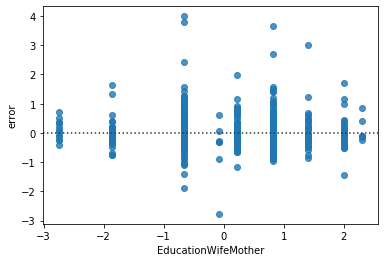

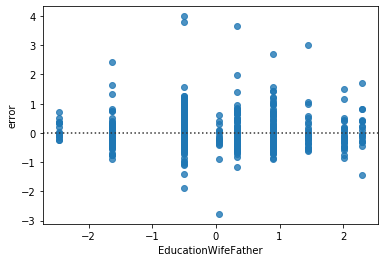

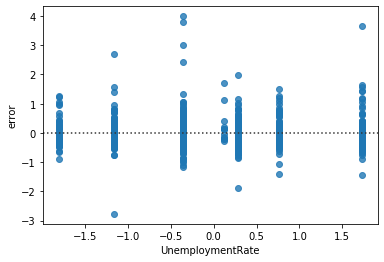

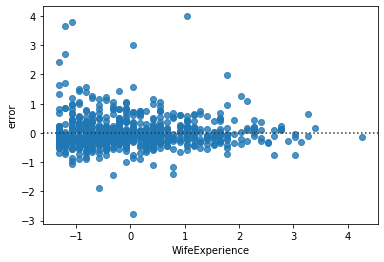

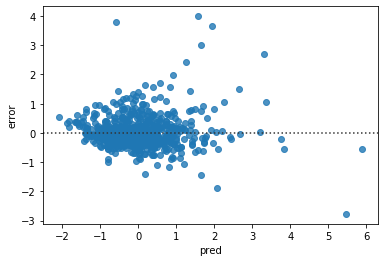

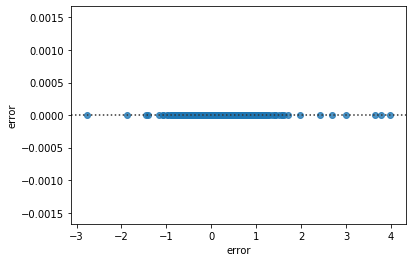

In [74]:
for names in range(0,len(X.columns)):
    sns.residplot(X.iloc[:,names],X['error'])
    plt.show()

# check of assumption-errors are normally distributed 

In [75]:
shapiro(np.abs(X['error']))

(0.6476626396179199, 1.1551167358164023e-36)

# RMSE

In [76]:
mse = (np.sum(np.square(X['error'])))/X.shape[0]
mse

0.29491311771770473

In [77]:
Lr_1 = np.sqrt(mse)

print("The Root Mean Square Error (RMSE) of the model is",Lr_1)

The Root Mean Square Error (RMSE) of the model is 0.5430590370463462


# PCA

# Build the covariance matrix

In [78]:
data_scaled_pca=data_scaled.drop(['FamilyIncome'],axis=1)
cov_matrix = np.cov(data_scaled_pca.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00132979e+00 -3.31582115e-02  1.06101321e-01  4.23506899e-01
   6.07723445e-01 -5.64225183e-02 -3.11300884e-02 -9.66326289e-03
  -9.87300540e-02  5.79406915e-02  1.36890778e-02 -6.03700052e-02
   4.05497226e-01]
 [-3.31582115e-02  1.00132979e+00 -1.20382861e-01 -3.46051004e-02
  -5.83924775e-02 -8.44837698e-02  8.89319009e-01 -1.63266264e-01
   2.70507312e-02 -2.34953587e-01 -1.60804404e-01  7.71793469e-02
   3.34460049e-01]
 [ 1.06101321e-01 -1.20382861e-01  1.00132979e+00  3.18801449e-01
   2.67930359e-01  7.90208661e-02 -1.33699059e-01  6.12767546e-01
   2.85315019e-01  4.35915402e-01  4.43046609e-01  7.22359587e-02
   6.63436673e-02]
 [ 4.23506899e-01 -3.46051004e-02  3.18801449e-01  1.00132979e+00
   6.52507648e-01 -5.99985405e-02 -3.18782667e-02  1.26391585e-01
   6.13711932e-02  9.04253051e-02  9.86077958e-02 -1.27896664e-04
   2.50913296e-01]
 [ 6.07723445e-01 -5.83924775e-02  2.67930359e-01  6.52507648e-01
   1.00132979e+00 -7.08913431e-02 -5.5472531

# Get the eigen values and vectors

In [79]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

# Cumulative variance by eigen values

In [80]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.90995273  41.42639427  55.14374403  64.63408697  71.77633194
  78.38248924  83.68940001  87.83830137  91.23096768  94.45812019
  96.9527968   99.17994318 100.        ]


# Scree plot to visualize cumulative variance

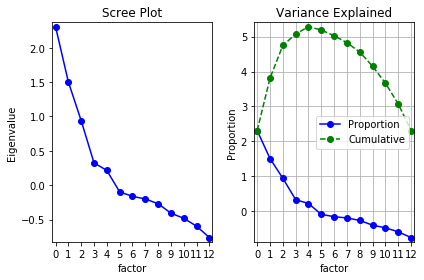

In [81]:
from statsmodels.multivariate.factor import Factor
model=Factor(data_scaled_pca).fit()
model.plot_scree()
plt.grid()
plt.show()

# Create PCA instance with 10 PCs

In [82]:
from statsmodels.multivariate.pca import PCA
pc = PCA(data_scaled_pca, 
         ncomp=10,
         standardize=True,  
         normalize=True,    
         missing=None,
        method='eig')

# Create Loading coeff

In [83]:
df_comp = pc.loadings.T
df_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,0.272897,-0.469483,-0.217753,0.132601,0.200938,0.165626,-0.459676,-0.252043,-0.418032,-0.099204,-0.199590,-0.268341,-0.032294
comp_3,-0.018008,0.240811,0.147597,-0.087855,-0.096155,0.650796,0.240164,0.079821,-0.375879,0.204903,0.204439,-0.417127,0.127637
comp_4,-0.102483,-0.006520,0.163898,0.150142,0.041395,0.235340,-0.031756,0.402812,0.378446,-0.491863,-0.431441,-0.376111,-0.083269
comp_5,-0.049063,-0.016368,0.106701,0.058249,0.052834,0.499722,-0.062166,0.113026,-0.201027,-0.205383,-0.162543,0.777235,0.016888
comp_6,0.169210,-0.120397,0.079933,-0.505451,-0.229379,-0.130600,-0.219035,0.301441,-0.047652,-0.020288,-0.139805,0.011534,0.681269
comp_7,0.553392,0.018785,-0.374411,-0.341212,0.094779,0.356809,0.043562,-0.057149,0.504272,0.043097,0.123742,0.059038,-0.142800
comp_8,-0.433752,-0.117491,-0.262116,0.249805,-0.005418,0.236434,-0.166138,-0.273919,0.343921,-0.126309,0.343706,-0.021222,0.505533
comp_9,-0.077610,0.020878,0.039356,0.151147,-0.111480,0.144537,-0.030827,-0.215808,0.239472,0.654106,-0.624121,0.024161,0.113983


# Create dimension reduced data

In [84]:
df_reduced_dimension = pc.factors
df_reduced_dimension.head()

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
0,-0.019107,-0.001738,0.067640,0.020916,0.000299,-0.015232,0.026699,0.007391,-0.002532,0.042661
1,-0.005178,-0.015930,0.058042,-0.054033,-0.005109,0.029012,0.004069,0.045280,-0.002926,-0.000683
2,-0.019851,0.019512,0.065041,0.041485,0.004189,-0.003137,0.007213,0.024790,-0.007590,0.043814
3,0.022086,-0.000003,0.028621,0.000746,0.006209,-0.036393,-0.023432,-0.031300,-0.030336,-0.028151
4,-0.055158,-0.009212,0.028315,-0.033167,-0.031157,-0.012545,-0.013346,0.021192,0.016615,-0.017214


In [85]:
X_pca=sm.add_constant(df_reduced_dimension)

# Build the model

In [86]:
model = sm.OLS(Y,X_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     164.9
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          5.18e-181
Time:                        20:46:03   Log-Likelihood:                -627.87
No. Observations:                 753   AIC:                             1278.
Df Residuals:                     742   BIC:                             1329.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.296e-17      0.020   1.61e-15      1.000      -0.040       0.040
comp_0       -11.4083      0.561    -20.330      0.000     -12.510     -10.307
comp_1         2.2616      0.561      4.030      0.000       1.160       3.363
comp_2        -9.4492      0.561    -16.839      0.000     -10.551      -8.348
comp_3        -1.9681      0.561     -3.507      0.000      -3.070      -0.866
comp_4        10.0170      0.561     17.851      0.000       8.915      11.119
comp_5        -0.1904      0.561     -0.339      0.735      -1.292       0.911
comp_6        -3.7950      0.561     -6.763      0.000      -4.897      -2.693
comp_7        11.9469      0.561     21.290      0.000      10.845      13.049
comp_8         4.0917      0.561      7.292      0.000       2.990       5.193
comp_9         4.0832      0.561      7.276      0.000       2.982       5.185
==============================================================================
Omnibus:                      422.306   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5746.454
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      15.777   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict the dependent variable based on model

In [87]:
ypred_pca = model.predict(X_pca)
X_pca['pred']=ypred_pca
X_pca['pred']

0     -0.309558
1      0.034997
2      0.033557
3     -0.978844
4      0.397949
         ...   
748    0.562059
749   -1.042557
750   -1.303853
751    0.362587
752   -0.052638
Name: pred, Length: 753, dtype: float64

# Create error term

In [46]:
X_pca['error']=Y-X_pca['pred']
X_pca['error']

0     -0.246224
1     -0.140118
2     -0.201064
3     -0.316548
4     -0.051588
         ...   
748   -0.141820
749   -0.031198
750    0.226158
751   -0.206341
752    0.486258
Name: error, Length: 753, dtype: float64

# RMSE

In [47]:
mse = (np.sum(np.square(X_pca['error'])))/X_pca.shape[0]
mse

0.31029585100779045

In [48]:
Lr_1 = np.sqrt(mse)

print("The Root Mean Square Error (RMSE) of the model is",Lr_1)

The Root Mean Square Error (RMSE) of the model is 0.5570420549723247


# Check assumption- Model is linear

<function matplotlib.pyplot.show(*args, **kw)>

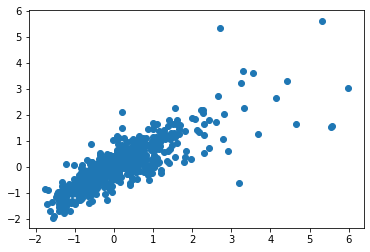

In [52]:
plt.scatter(Y,X_pca['pred'])
plt.show

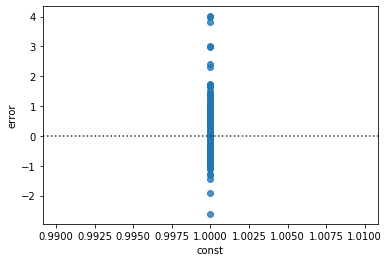

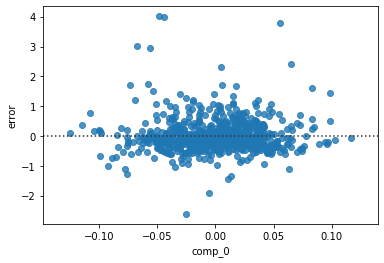

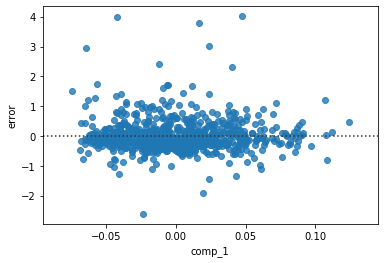

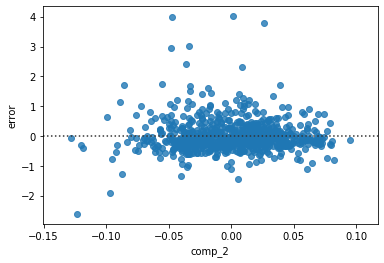

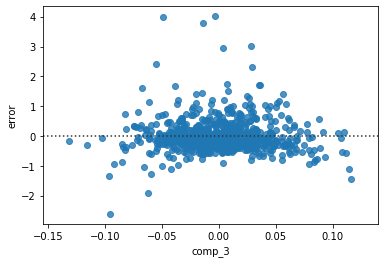

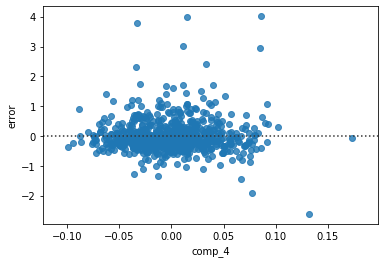

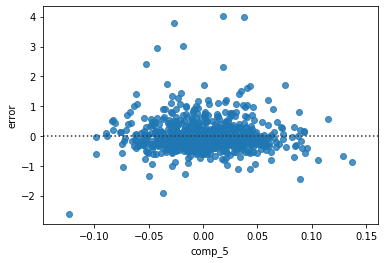

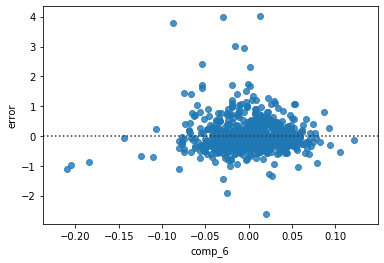

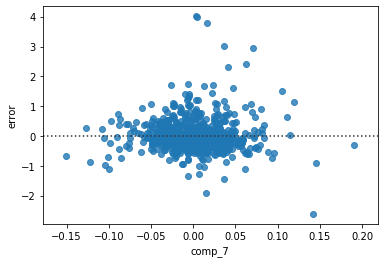

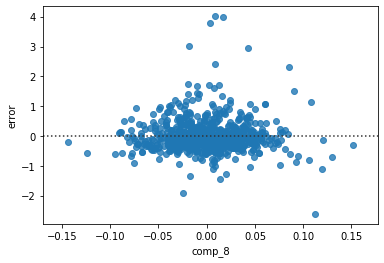

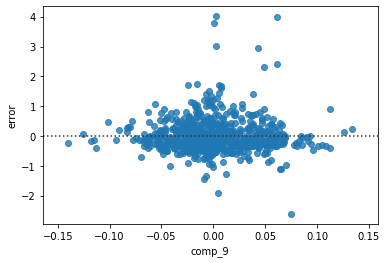

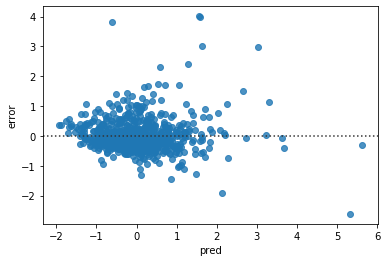

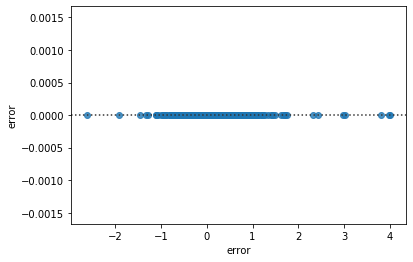

In [53]:
for names in range(0,len(X_pca.columns)):
    sns.residplot(X_pca.iloc[:,names],X_pca['error'])
    plt.show()

In [54]:
shapiro(np.abs(X_pca['error']))

(0.643339216709137, 7.910099793957689e-37)